In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm

rays aperture 0.0
rays aperture 0.21838284
rays aperture 0.22546387
rays aperture 0.24577713
rays aperture 0.16153336
rays aperture 0.0
rays aperture 0.19062042
rays aperture 0.2190361


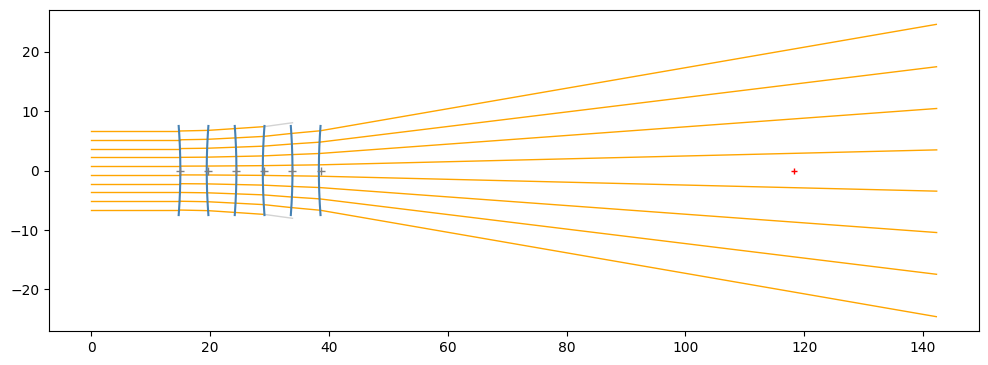

[  0/100] L= 174.604 | grad norm= 56455.44140625
[  5/100] L= 66.471 | grad norm= 32098.3125


[ 10/100] L= 21.411 | grad norm= 20930.7734375
[ 15/100] L=  0.067 | grad norm= 1076.0242919921875


[ 20/100] L=  5.305 | grad norm= 9075.24609375
[ 25/100] L=  9.837 | grad norm= 12108.826171875


[ 30/100] L=  7.271 | grad norm= 10524.0361328125
[ 35/100] L=  2.379 | grad norm= 6185.55419921875


[ 40/100] L=  0.064 | grad norm= 1039.7447509765625
[ 45/100] L=  0.444 | grad norm= 2802.1142578125


[ 50/100] L=  0.908 | grad norm= 4029.52783203125
[ 55/100] L=  0.486 | grad norm= 2932.1865234375


[ 60/100] L=  0.046 | grad norm= 895.1363525390625
[ 65/100] L=  0.033 | grad norm= 748.0841674804688


[ 70/100] L=  0.111 | grad norm= 1372.751708984375
[ 75/100] L=  0.067 | grad norm= 1063.9344482421875


[ 80/100] L=  0.006 | grad norm= 318.9662170410156
[ 85/100] L=  0.006 | grad norm= 311.4380187988281


[ 90/100] L=  0.016 | grad norm= 520.74609375
[ 95/100] L=  0.007 | grad norm= 346.39190673828125


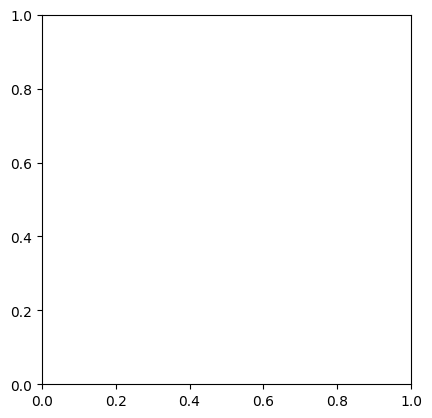

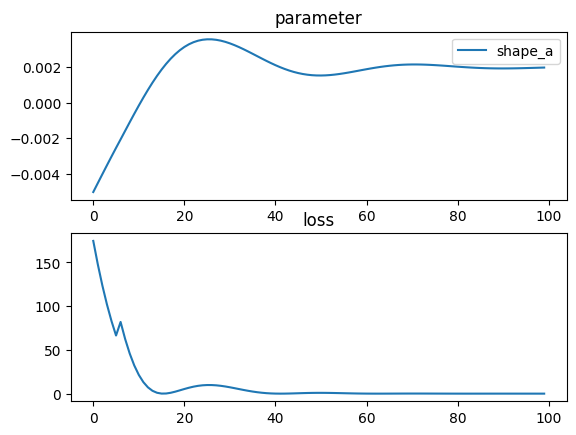

rays aperture 0.0
rays aperture 0.08559704
rays aperture 0.084487915
rays aperture 0.08115196
rays aperture 0.07795906
rays aperture 0.07173538
rays aperture 0.066856384


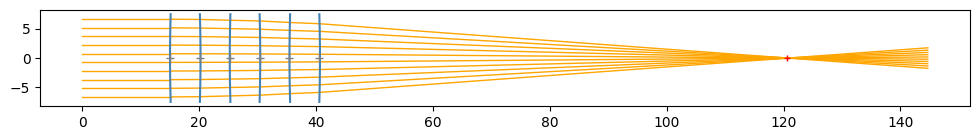

In [2]:
    
lens_width = 15.0

class Optics(tlm.Module):
    def __init__(self):
        super().__init__()

        self.shape = tlm.Parabola(lens_width, a=nn.Parameter(torch.tensor(-0.005)))
        
        surface1 = tlm.RefractiveSurface(self.shape, (1.0, 1.49), anchors=("origin", "extent"))
        surface2 = tlm.RefractiveSurface(self.shape, (1.49, 1.0), scale=-1, anchors=("extent", "origin"))

        lens = [surface1, tlm.Gap(5.0), surface2]
        
        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=0.9*lens_width),
            tlm.Gap(15.),
            
            *lens,
            tlm.Gap(5.),
            *lens,
            tlm.Gap(5.),
            *lens,
            
            tlm.Gap(80.), # focal length
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)


optics = Optics()


tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=5e-4),
    sampling = {"rays": 10},
    num_iter = 100
)

tlm.render_plt(optics)